# Exercise 1: Linear regression with multiple variables

The code below represents my implementation of linear regression with multiple variables with Python. **Vectorized** solutions only are provided below.

Jupyter notebook template modified from: https://github.com/dibgerge/ml-coursera-python-assignments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## 1. Feature normalization

Based on ex1_multi.m, we could see that that house sizes are nearly 1000 times the number of bedrooms. Feature scaling can make gradient descent converge more quickly.


**Implementation note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

### 1.1 Reading data

In [2]:
# Read data
df = pd.read_csv('ex1data2.txt', header=None, names=['Area', 'Bedrooms', 'Price'])

### 1.2 Feature normalization

In [3]:
def featureNormalize(df):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    df : pandas dataframe
        The dataset of shape (m x n).
    
    Returns
    -------
    X : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You need to perform the normalization separately for each feature. 

    """
    m = len(df)
    X = np.column_stack((df['Area'], df['Bedrooms']))
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=1)
    
    # Feature normalization with standard deviation
    X = (X - mu) / sigma
    X = np.column_stack((np.ones(m), X)) # Add feature of ones
    
    return X, mu, sigma

In [4]:
X, mu, sigma = featureNormalize(df)
y = df['Price'].to_numpy()

## 2. Implementing gradient descent

### 2.1 Hypothesis function

In [5]:
def hypothesis(X, theta):
    """
    Computes the hypothesis.
    
    Parameters
    ----------
    X : np.array
        The input dataset of shape (m x n+1), where m is the 
        number of examples, and n is the number of features. 
    
    theta : np.array
        The parameters for the regression function. This is a vector of 
        shape (n, 1).
    
    Returns
    -------
    hypothesis : np.array
        Prediction using theta and X.
    
    """
        
    return X.dot(theta)

### 2.2 Cost function

In [6]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. 
    Computes the cost of using theta as the parameter for 
    linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : np.array
        The input dataset of shape (m x n+1), where m is the 
        number of examples, and n is the number of features.
    
    y : np.array
        The values of the function at each data point. 
        This is a vector of shape (m, 1).
    
    theta : np.array
        The parameters for the regression function. This is a vector of 
        shape (n, 1).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    """ 
    m = len(y)
    h = hypothesis(X, theta)
    J = ((h - y).T).dot(h - y) / (2 * m)
    
    return J

### 2.3 Gradient descent function

In [11]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking 
    `iterations` gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : np.array
        The input dataset of shape (m x n+1), where m is the 
        number of examples, and n is the number of features.
    
    y : np.array
        The values of the function at each data point. 
        This is a vector of shape (m, 1).
    
    theta : np.array
        The parameters for the regression function. This is a vector of 
        shape (n, 1).
    
    alpha : float
        The learning rate.
    
    iterations : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : np.array
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : np.array
        A python list for the values of the cost function after each iteration.
    
    """
    
    m = len(y)
    J_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        h = hypothesis(X, theta)
        theta -= ((h - y).dot(X)) * (alpha / m)
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history

In [12]:
# -------- Run gradient descent ------------ #
#  Choose some alpha value
alpha = 0.15;
num_iters = 400;

# Initialize theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

print(f'Theta found by gradient descent: {theta[0]:.2f}, {theta[1]:.2f}, {theta[2]:.2f}')

Theta found by gradient descent: 340412.66, 110631.05, -6649.47


In [13]:
# -------- Predict price ------------ #
test_data  = (np.array((1650, 3)) - mu) / sigma
X_test = np.hstack((np.ones(1), test_data))
price = X_test.dot(theta)

print (f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price:.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081.46


### 2.4 Convergence graph

In [15]:
from collections import defaultdict

def plotConvergenceGraph(X, y, iterations):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking 
    `iterations` gradient steps with learning rate `alpha`.
    Yields a graph to demonstrate change in J.
    
    Parameters
    ----------
    X : np.array
        The input dataset of shape (m x n+1), where m is the 
        number of examples, and n is the number of features.
    
    y : np.array
        The values of the function at each data point. 
        This is a vector of shape (m, 1).
    
    iterations : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    fig: matplotlib.pyplot graph object
        A graph of J with different learning rates
        
    """
    
    alpha = [0.1, 0.03, 0.01, 0.003]
    theta = np.zeros(3)
    
    J = defaultdict(list)
    
    for i in range(len(alpha)):
        theta, J_history = gradientDescentMulti(X, y, theta, alpha[i], iterations)
        J[alpha[i]].append(J_history)
    
    for key, value in J.items():
        plt.plot([i for i in range(iterations)], value[0], label=key)
    
    plt.ylabel(r'J($\theta$)')
    plt.xlabel('Iterations')    
    plt.legend()

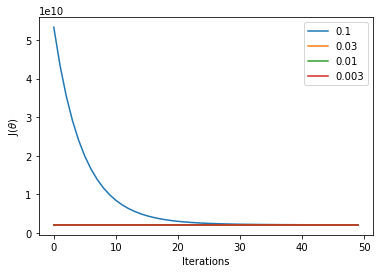

In [16]:
plotConvergenceGraph(X, y, iterations=50)

## 3. Implementing the normal equation

The closed-form solution to linear regression is
$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

In [17]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    
    # Normal equation
    term_1 = np.linalg.inv(X.T.dot(X))
    term_2 = (X.T.dot(y))
    
    return term_1.dot(term_2)

In [18]:
# Read data
df = pd.read_csv('ex1data2.txt', header=None, names=['Area', 'Bedrooms', 'Price'])

# Format features
m = len(df)
X = np.column_stack((np.ones(m),
                     df['Area'].to_numpy(),
                     df['Bedrooms'].to_numpy()
                    ))
y = df['Price'].to_numpy()

In [19]:
theta = normalEqn(X, y)
print(f'Theta found by gradient descent: {theta[0]:.2f}, {theta[1]:.2f}, {theta[2]:.2f}')

Theta found by gradient descent: 89597.91, 139.21, -8738.02


In [20]:
X_test = np.array((1, 1650, 3))
price = hypothesis(X_test, theta)

print (f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price:.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081.46
